#Introduction to the Research Environment

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

##Code Cells vs. Text Cells

As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

##Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

In [1]:
2 + 2

4

In [2]:
####
579 + 85

664

Sometimes there is no result to be printed, as is the case with assignment.

In [3]:
X = 2

In [4]:
####
Y = 29

Remember that only the result from the last line is printed.

In [5]:
2 + 2
3 + 3

6

In [6]:
7 * 9
3 * 3

9

However, you can print whichever lines you want using the `print` statement.

In [7]:
print (2 + 2)
3 + 3

4


6

In [8]:
print(7 * 9)
3 * 3

63


9

##Knowing When a Cell is Running

While a cell is running, a `[*]` will display on the left. When a cell has yet to be executed, `[ ]` will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook `[5]`. Try on this cell and note it happening.

In [9]:
#Take some time to run something
c = 0
for i in range(10000000):
    c = c + i
c

49999995000000

In [10]:
####
i = 0
while i < 900000:
  i+=1
i

900000

##Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The `as` statement allows this. Here we use `np` and `pd` as aliases for `numpy` and `pandas`. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

In [11]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

In [12]:
import math as mt

##Tab Autocomplete

Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the `.` and pressing tab.

In [13]:
np.random.beta

<function RandomState.beta>

In [14]:
####
mt.cos(1)


0.5403023058681398

##Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [15]:
np.random.normal?

In [16]:
####
mt.cos?

##Sampling

We'll sample some random data using a function from `numpy`.

In [17]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)


In [18]:
####
Y = np.random.normal(0,1,10)


##Plotting

We can use the plotting library we imported as follows.

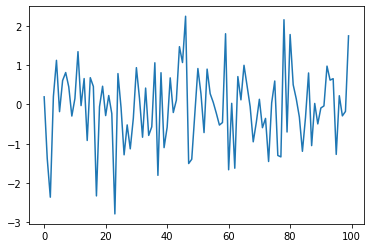

In [19]:
plt.plot(X)

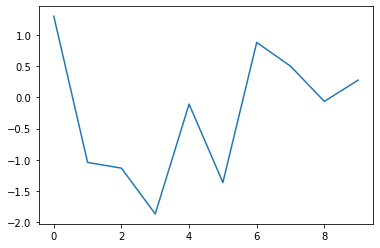

In [20]:
####
plt.plot(Y)

###Squelching Line Output

You might have noticed the annoying line of the form `[<matplotlib.lines.Line2D at 0x7f72fdbc1710>]` before the plots. This is because the `.plot` function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

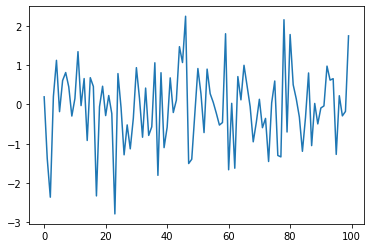

In [21]:
plt.plot(X);

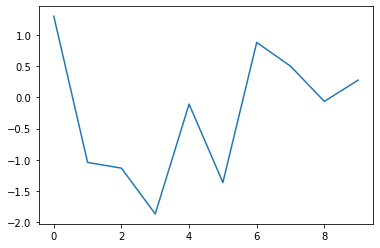

In [22]:
####
plt.plot(Y);

###Adding Axis Labels

No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

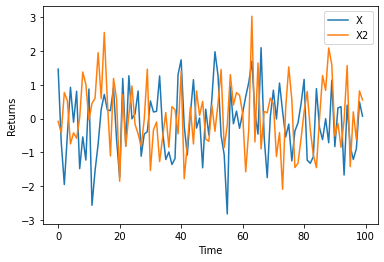

In [23]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

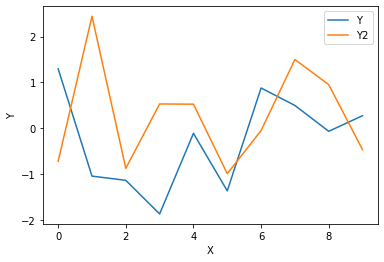

In [24]:
####
Y2 = np.random.normal(0,1, 10)
plt.plot(Y);
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(Y2);
plt.legend(['Y','Y2'])

##Generating Statistics

Let's use `numpy` to take some simple statistics.

In [25]:
np.mean(X)

-0.11096560386776881

In [26]:
####
np.mean(Y)

-0.26200928985902716

In [27]:
np.std(X)

0.9916749049945202

In [28]:
####
np.std(Y)

0.9907223320669608

##Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

In [29]:
# data = get_pricing('MSFT', start_date='2012-1-1', end_date='2015-6-1')

In [30]:
import pandas_datareader as pdr
import datetime
data = pdr.get_data_yahoo('MSFT',start=datetime.datetime(2006,10,1),end=datetime.datetime(2012,1,1))

In [31]:
pdr.get_data_yahoo?

In [32]:
data2 = pdr.get_data_yahoo('AAPL',start=datetime.datetime(2006,10,1),end=datetime.datetime(2012,1,1))

Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

In [33]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,27.490000,27.150000,27.320000,27.360001,52908100.0,20.054806
2006-10-03,27.480000,27.209999,27.370001,27.370001,39386200.0,20.062134
2006-10-04,27.959999,27.370001,27.389999,27.940001,82191200.0,20.479940
2006-10-05,28.110001,27.780001,27.920000,27.920000,81967200.0,20.465279
2006-10-06,28.000000,27.650000,27.760000,27.870001,36452200.0,20.428627
...,...,...,...,...,...,...
2011-12-23,26.040001,25.730000,25.910000,26.030001,23205800.0,21.196671
2011-12-27,26.139999,25.930000,25.959999,26.040001,21287200.0,21.204819
2011-12-28,26.150000,25.760000,26.110001,25.820000,29822500.0,21.025665


In [34]:
data2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.302917
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.278921
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.318914
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.301993
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.283228
...,...,...,...,...,...,...
2011-12-23,14.413929,14.267500,14.274643,14.404643,269399200,12.407633
2011-12-27,14.610357,14.393571,14.396429,14.518929,265076000,12.506072
2011-12-28,14.580357,14.333571,14.531786,14.380000,228662000,12.386407


This is a pandas dataframe, so we can index in to just get price like this. For more info on pandas, please [click here](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [35]:
# X = data['price']

In [36]:
####
X = data['Close']


In [37]:
####
Y = data2['Close']

Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

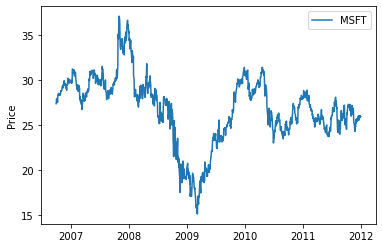

In [38]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

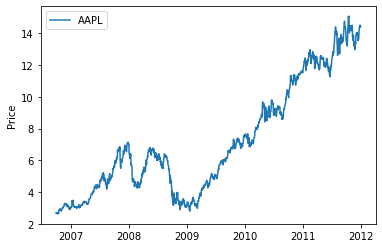

In [39]:
####
plt.plot(Y.index, Y.values)
plt.ylabel('Price')
plt.legend(['AAPL']);

We can get statistics again on real data.

In [40]:
np.mean(X)

26.746492836390672

In [41]:
####
np.mean(Y)

7.222287817066219

In [42]:
np.std(X)

3.7619481458980424

In [43]:
####
np.std(Y)

3.528599093703905

##Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).

In [44]:
R = X.pct_change()[1:]
R

Date
2006-10-03    0.000366
2006-10-04    0.020826
2006-10-05   -0.000716
2006-10-06   -0.001791
2006-10-09   -0.005382
                ...   
2011-12-23    0.008524
2011-12-27    0.000384
2011-12-28   -0.008449
2011-12-29    0.007746
2011-12-30   -0.002306
Name: Close, Length: 1322, dtype: float64

In [45]:
####
R2 = Y.pct_change()[1:]

We can plot the returns distribution as a histogram.

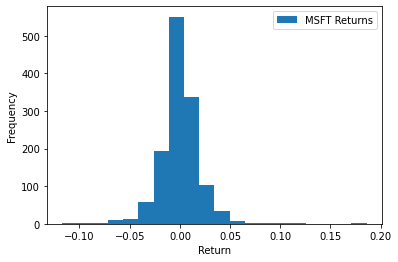

In [46]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

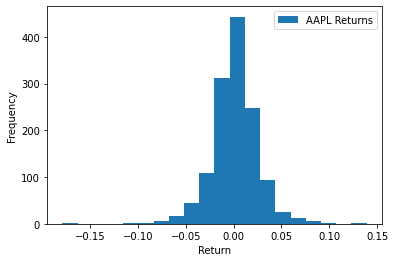

In [47]:
####
plt.hist(R2, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['AAPL Returns']);

Get statistics again.

In [48]:
np.mean(R)

0.0001608092808263218

In [49]:
####
np.mean(R2)

0.001566485043061191

In [50]:
np.std(R)

0.02009174940974263

In [51]:
####
np.std(R2)

0.023983051900172317

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

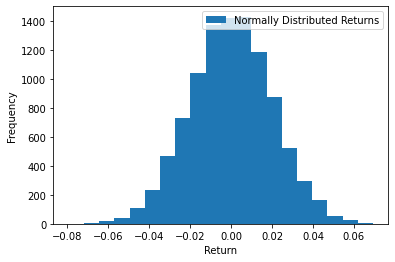

In [52]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

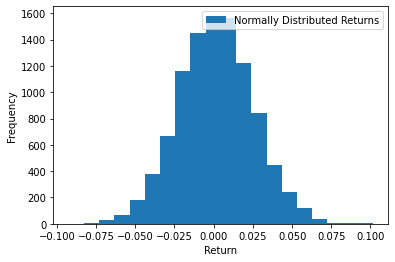

In [53]:
plt.hist(np.random.normal(np.mean(R2), np.std(R2), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

##Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

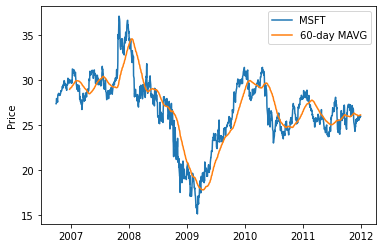

In [54]:
# Take the average of the last 60 days at each timepoint.
MAVG = X.rolling(60).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.